In [31]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(360, 360, 3)


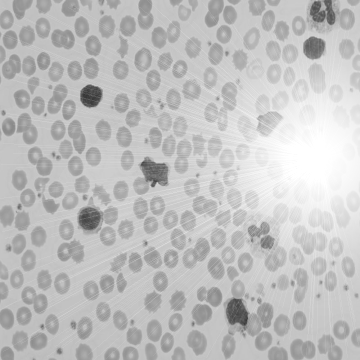

In [124]:
#img = cv2.imread('/content/drive/MyDrive/IP/CH04/L.jpg')
#img = cv2.imread('/content/drive/MyDrive/IP/CH04/rice.bmp')
img = cv2.imread('/content/drive/MyDrive/IP/CH04/CB.bmp')
#img = cv2.imread('/content/drive/MyDrive/IP/CH04/M.bmp')
print(img.shape)
gImg1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gImg1, cmap='gray')
cv2_imshow(gImg1)

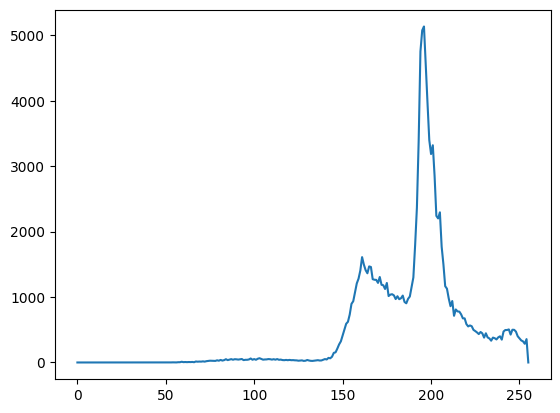

In [125]:
hist = cv2.calcHist([gImg1], [0], None, [256], [0, 255])
plt.plot(hist)

In [127]:
gBin = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype=np.ubyte)

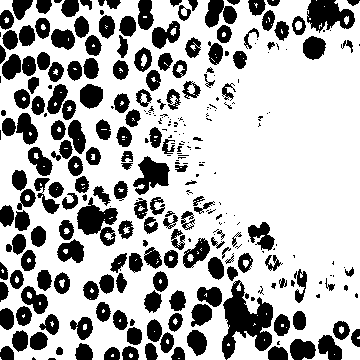

In [128]:
Threshold = 180
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h, w] > Threshold:
      gBin[h, w] = 255
    else:
      gBin[h, w] = 0

cv2_imshow(gBin)

In [129]:
T1 = 150
T2 = 0
T0 = 1

In [130]:
def threshold_update(img, bimg, T1):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1
  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if bimg[h, w] == 0:
        sum1 += img[h, w]
        count1 += 1
      else:
        sum2 += img[h, w]
        count2 += 1
  avg1 = sum1 / count1
  avg2 = sum2 / count2
  T = (avg1 + avg2) / 2
  return T


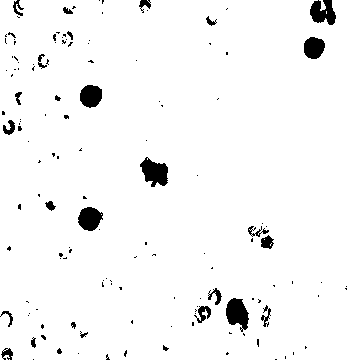

In [131]:
for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if gImg1[h, w] > T1:
        gBin[h, w] = 255
      else:
        gBin[h, w] = 0

cv2_imshow(gBin)

0.0007523090099613429
0.0007523090099613429


/tmp/ipython-input-3266920134.py:9: RuntimeWarning: overflow encountered in scalar add
  sum1 += img[h, w]


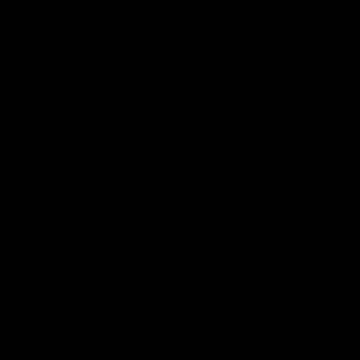

In [135]:
while True:
  T2 = threshold_update(gImg1, gBin, T2)
  print(T2)
  if(np.abs(T1 - T2) < T0):
    break
  else:
    T1 = T2
    for h in range(img.shape[0]):
      for w in range(img.shape[1]):
        if gImg1[h, w] > T1:
          gBin[h, w] = 0
        else:
          gBin[h, w] = 255
print(T2)
cv2_imshow(gBin)
